In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train=pd.read_csv("../input/tabular-playground-series-oct-2021/train.csv")
test=pd.read_csv("../input/tabular-playground-series-oct-2021/test.csv")
submission=pd.read_csv("../input/tabular-playground-series-oct-2021/sample_submission.csv")
print(train.head())
print(test.head())

   id        f0        f1        f2        f3        f4        f5        f6  \
0   0  0.205979  0.410993  0.176775  0.223581  0.423543  0.476140  0.413590   
1   1  0.181004  0.473119  0.011734  0.213657  0.619678  0.441593  0.230407   
2   2  0.182583  0.307431  0.325950  0.207116  0.605699  0.309695  0.493337   
3   3  0.180240  0.494592  0.008367  0.223580  0.760618  0.439211  0.432055   
4   4  0.177172  0.495513  0.014263  0.548819  0.625396  0.562493  0.117158   

         f7        f8  ...  f276  f277  f278  f279  f280  f281  f282  f283  \
0  0.612021  0.534873  ...     0     1     0     0     0     0     0     0   
1  0.686013  0.281971  ...     0     1     0     0     0     0     0     0   
2  0.751107  0.536272  ...     0     0     0     1     1     0     0     0   
3  0.776147  0.483958  ...     0     0     0     0     1     0     0     0   
4  0.561255  0.077115  ...     0     1     1     0     1     0     0     1   

   f284  target  
0     0       1  
1     0       1  
2 

In [3]:
train.loc[:, 'f0':'f284'].describe().T.style.bar(subset=['mean'], color='#205ef2')\
                            .background_gradient(subset=['std'], cmap='Greens')\
                            .background_gradient(subset=['50%'], cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
f0,1000000.000000,0.214334,0.053320,0.041790,0.181676,0.204498,0.229684,1.000000
f1,1000000.000000,0.460218,0.101316,0.022016,0.389215,0.453893,0.526023,0.959019
f2,1000000.000000,0.129253,0.120805,0.000381,0.017692,0.095496,0.177717,0.994818
f3,1000000.000000,0.277598,0.063163,0.000000,0.235342,0.264669,0.305837,0.979797
f4,1000000.000000,0.580710,0.115338,0.000000,0.497938,0.565059,0.657024,1.000000
f5,1000000.000000,0.416619,0.058231,0.000959,0.374390,0.414009,0.458360,0.907889
f6,1000000.000000,0.386532,0.133457,0.000592,0.317815,0.420260,0.477140,0.972601
f7,1000000.000000,0.654858,0.065158,0.017994,0.615372,0.648562,0.692666,0.986195
f8,1000000.000000,0.462256,0.129439,0.000990,0.363753,0.475701,0.561372,0.986118
f9,1000000.000000,0.258031,0.119081,0.051183,0.164559,0.227714,0.300988,0.980994


In [4]:
np.random.seed(2110)
train = train.sample(10000)
test = test.sample(10000)

features = "f2 f10 f23 f44 f68 f70  f73 f98 f104 f105 f120 f138 f139 f141 f142 f143 f146 f157 f158 f175 f187 f188 f200 f222 f239".split()

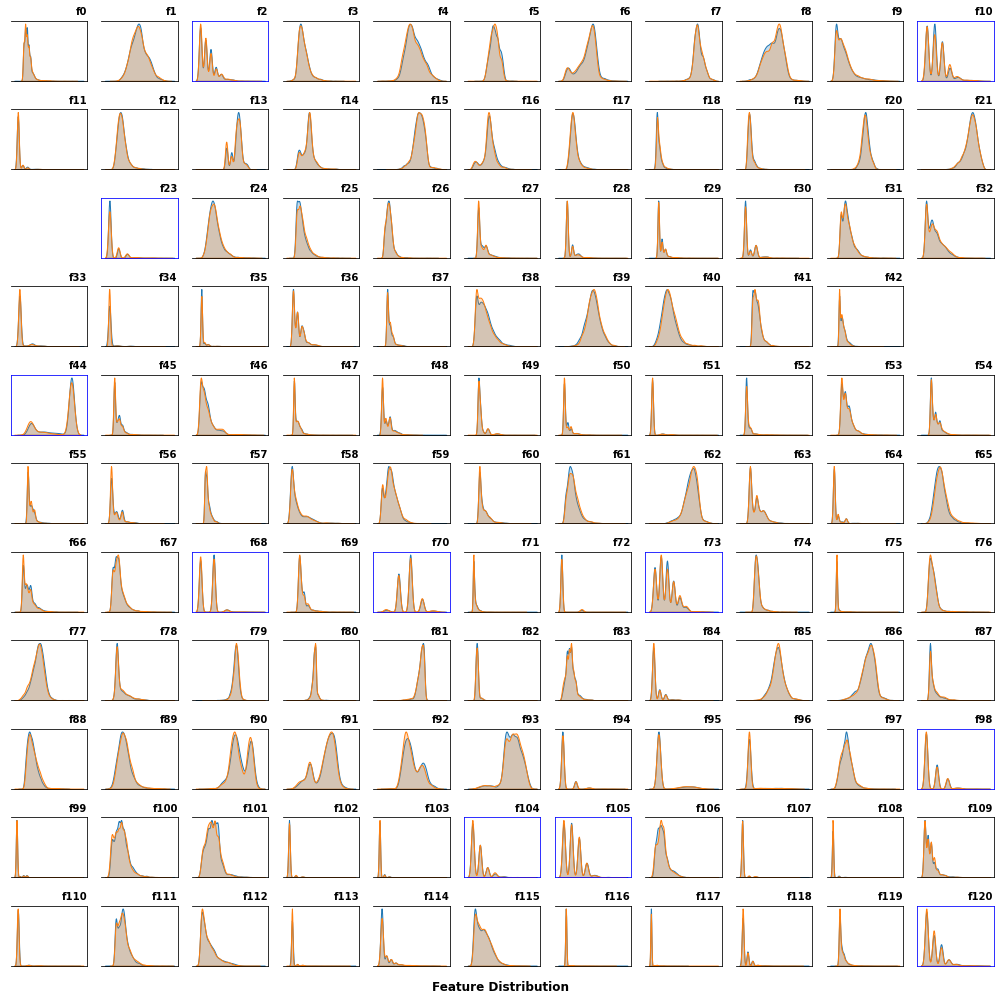

In [5]:
fig, axes = plt.subplots(11,11,figsize=(14, 14))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx in [22, 43]:
        ax.axis("off")
        continue
    sns.kdeplot(data=train, x=f'f{idx}', 
                fill=True, 
                ax=ax)
    sns.kdeplot(data=test, x=f'f{idx}', 
                fill=True, 
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    if f'f{idx}' in features:
        ax.spines[:].set_visible(True)
        ax.spines[:].set_color('blue')
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Feature Distribution', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

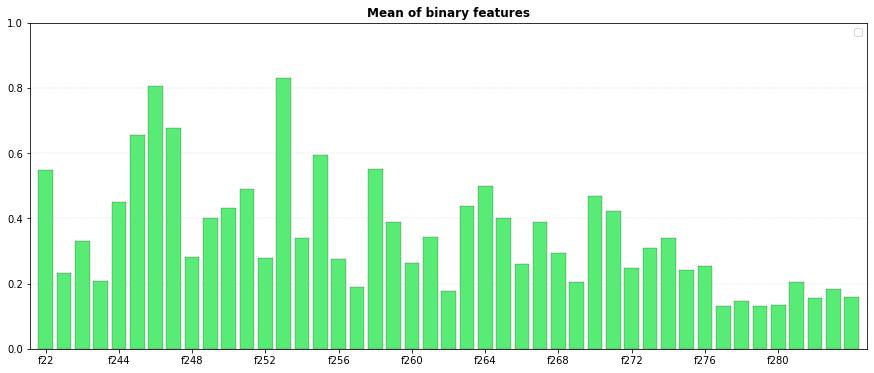

In [6]:
binary_mean = train.loc[:,['f22', 'f43']+[f'f{i}' for i in range(242, 285)]].mean()

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.bar(binary_mean.index, binary_mean, linewidth=0.2, edgecolor='black', alpha=1, color='#58ec76')

ax.set_ylim(0, 1)
ax.set_xticks(range(0, 44, 4))
ax.margins(0.01)
ax.grid(axis='y', linestyle='--', linewidth=0.2, zorder=5)
ax.set_title('Mean of binary features', loc='center', fontweight='bold')
ax.legend()
plt.show()